In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
bank_scoring_train = pd.read_csv('../info/bank_scoring_train.csv', sep='\t')
bank_scoring_test = pd.read_csv('../info/bank_scoring_test.csv', sep='\t')

In [3]:
bank_scoring_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.975614,39,1,0.678552,1850.0,4,0,0,0,3.0
1,0,0.006634,75,0,0.082087,10500.0,21,0,1,0,0.0
2,0,0.227432,48,1,0.202145,6059.0,9,0,1,0,3.0
3,0,0.290217,59,0,0.674392,4400.0,6,0,2,0,0.0
4,0,0.000000,80,0,0.000000,2596.0,2,0,0,0,1.0


In [4]:
bank_scoring_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96216 entries, 0 to 96215
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      96216 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  96216 non-null  float64
 2   age                                   96216 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  96216 non-null  int64  
 4   DebtRatio                             96216 non-null  float64
 5   MonthlyIncome                         96216 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       96216 non-null  int64  
 7   NumberOfTimes90DaysLate               96216 non-null  int64  
 8   NumberRealEstateLoansOrLines          96216 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  96216 non-null  int64  
 10  NumberOfDependents                    96216 non-null  float64
dtypes: float64(4), 

In [5]:
bank_scoring_train.corr()['SeriousDlqin2yrs'][1:]

RevolvingUtilizationOfUnsecuredLines   -0.003465
age                                    -0.107130
NumberOfTime30-59DaysPastDueNotWorse    0.120440
DebtRatio                              -0.001070
MonthlyIncome                          -0.020474
NumberOfOpenCreditLinesAndLoans        -0.025130
NumberOfTimes90DaysLate                 0.106295
NumberRealEstateLoansOrLines            0.000773
NumberOfTime60-89DaysPastDueNotWorse    0.091719
NumberOfDependents                      0.046431
Name: SeriousDlqin2yrs, dtype: float64

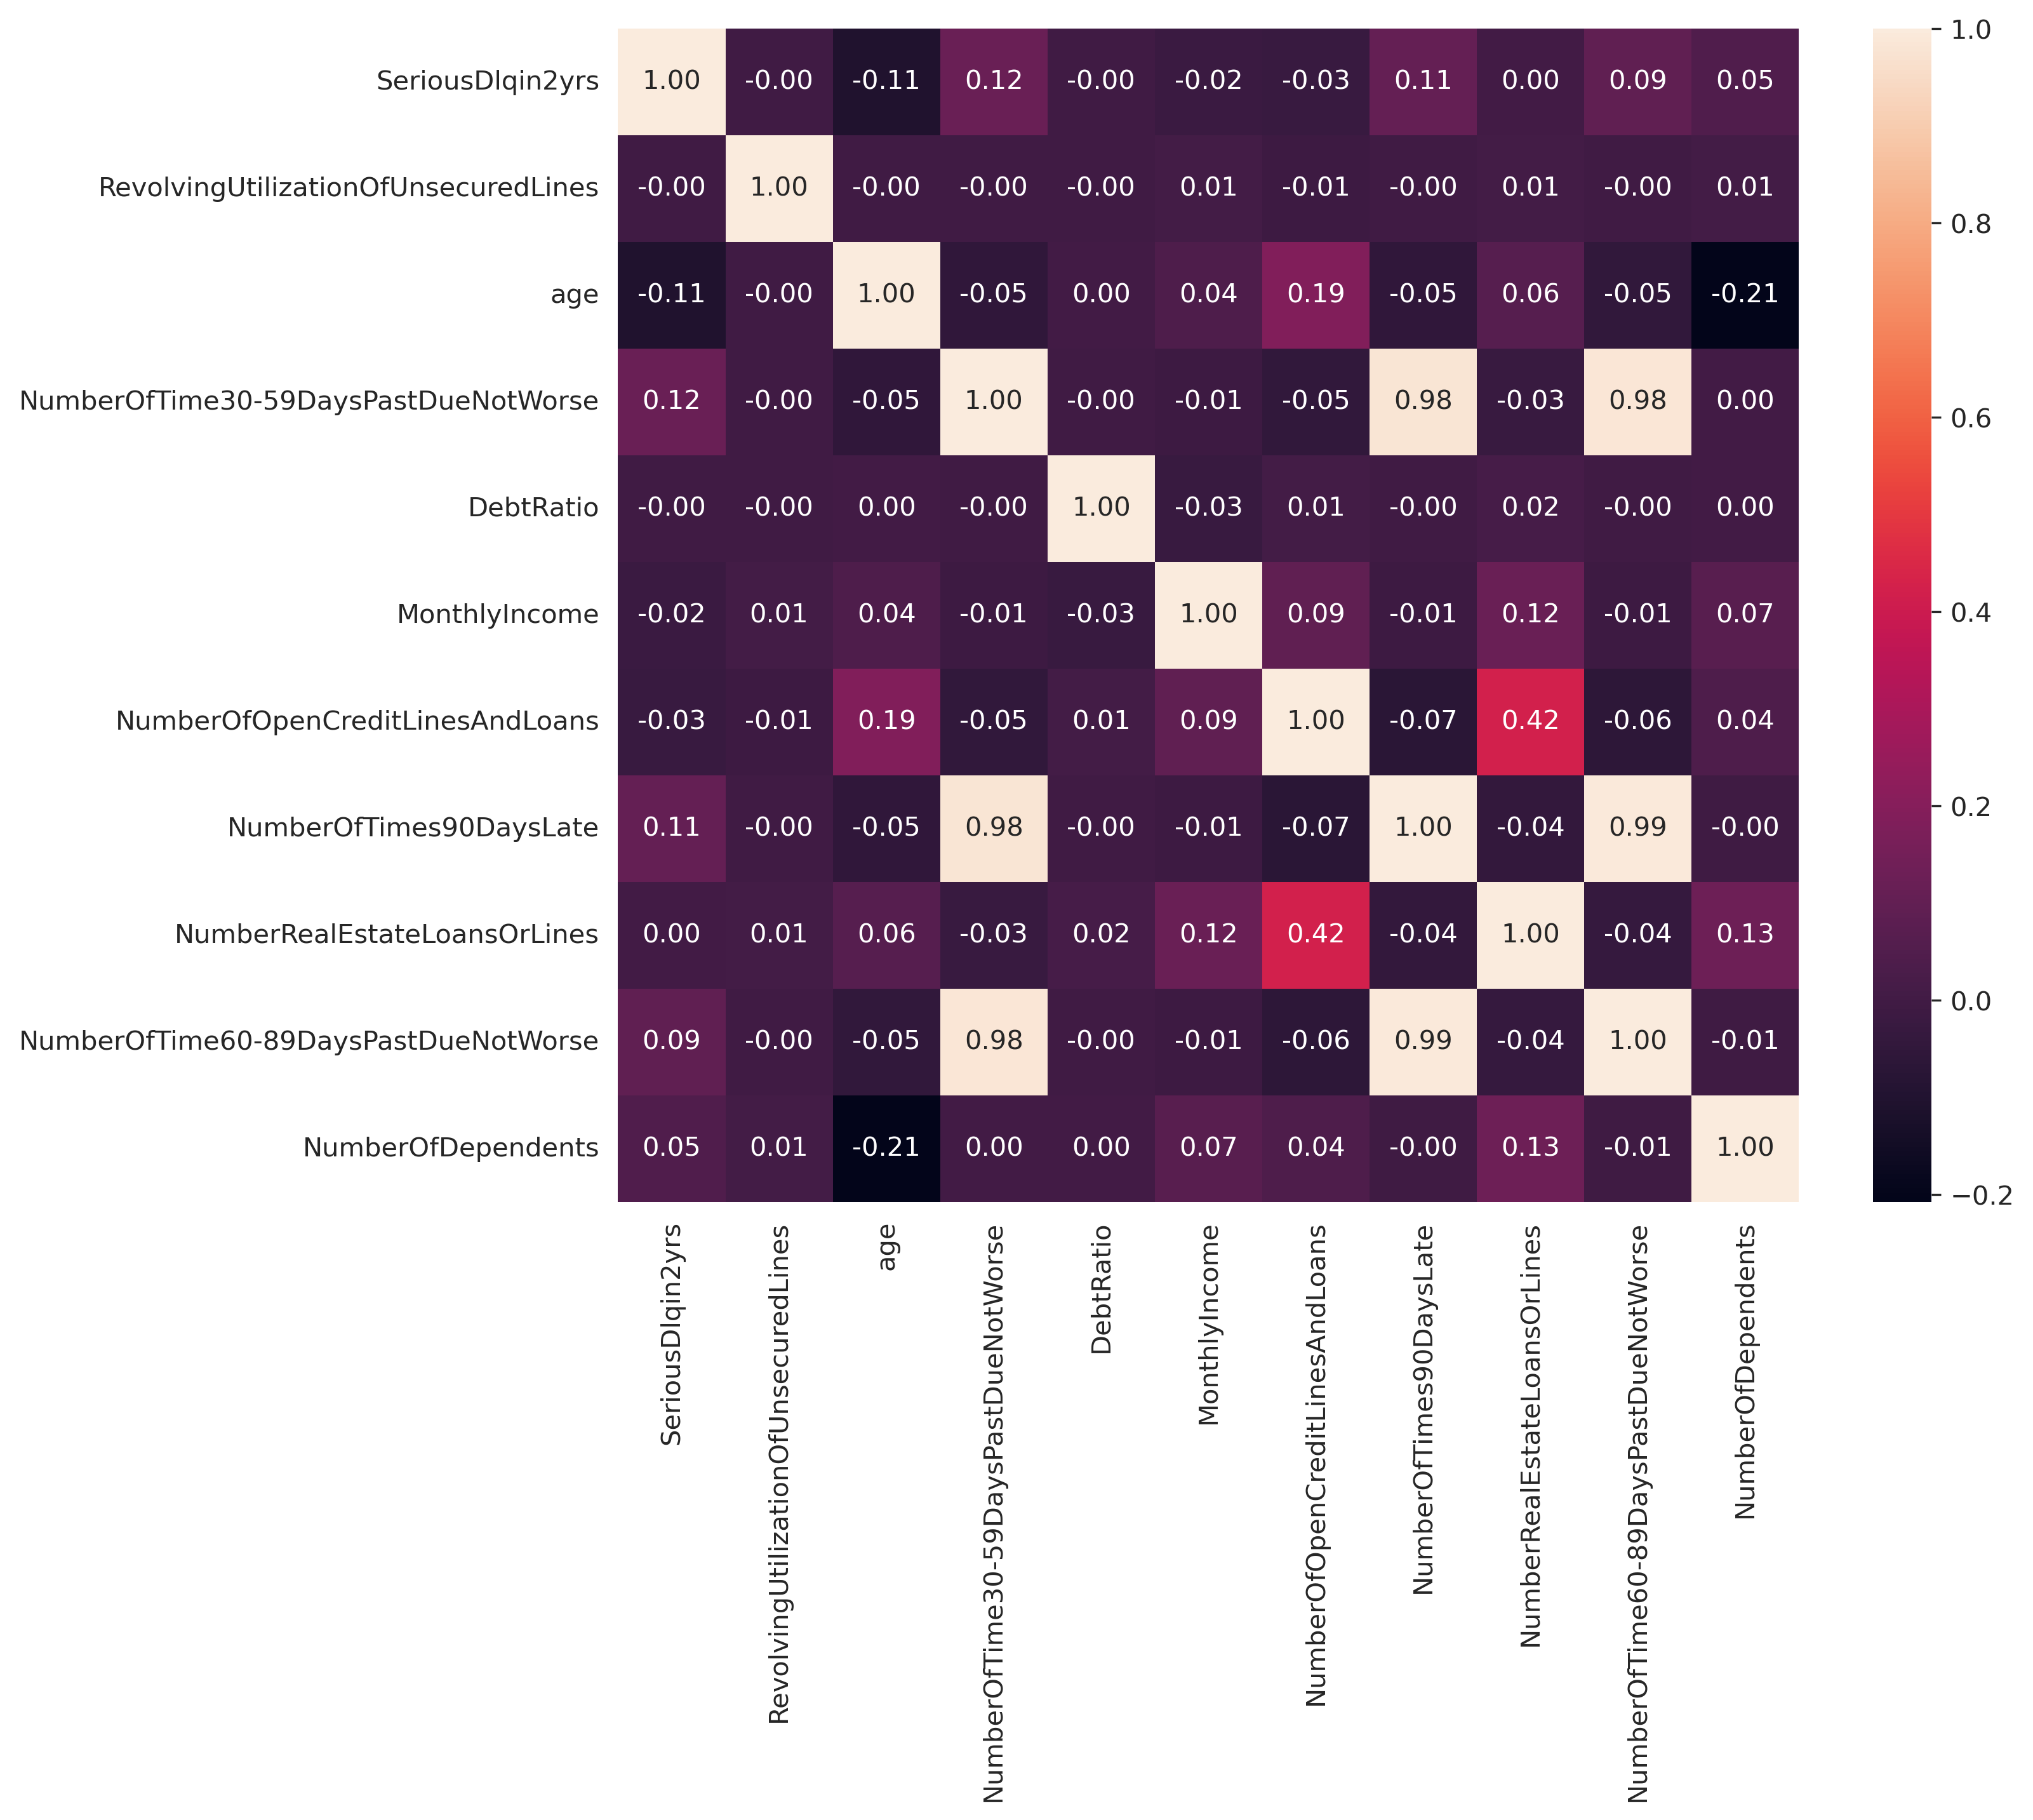

In [6]:
plt.figure(figsize=(10, 8), dpi=300)
sns.heatmap(bank_scoring_train.corr(), annot=True, fmt='.2f');
plt.savefig('report_pictures/heatmap.png')

In [7]:
bank_scoring_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

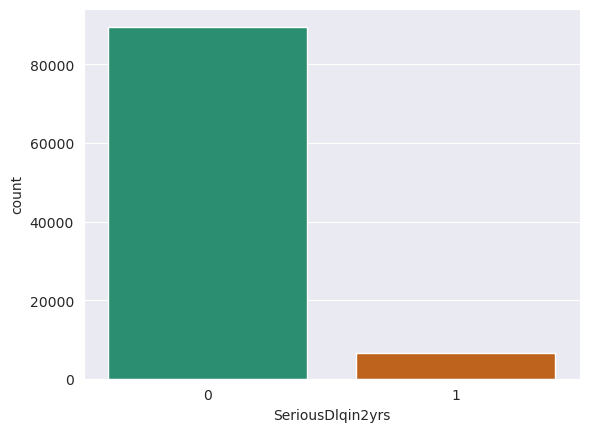

In [8]:
sns.countplot(data=bank_scoring_train, x='SeriousDlqin2yrs', palette='Dark2')
plt.savefig('report_pictures/countplot.png')

In [9]:
X, y = bank_scoring_train.drop('SeriousDlqin2yrs', axis=1), bank_scoring_train['SeriousDlqin2yrs']
X_test, y_test = bank_scoring_test.drop('SeriousDlqin2yrs', axis=1), bank_scoring_test['SeriousDlqin2yrs']

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
decision_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [12]:
dt_params = {'max_depth': list(range(1, 4)), 'max_features': ['log2', 'sqrt']}
grid_tree = GridSearchCV(decision_tree, dt_params, scoring='roc_auc')
grid_tree.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [1, 2, 3],
                         'max_features': ['log2', 'sqrt']},
             scoring='roc_auc')

In [13]:
grid_tree.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       max_features='log2', random_state=42)

In [14]:
from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay

In [15]:
def calculate_metrics(model):
    plt.figure(figsize=(10, 8), dpi=200)
    print(classification_report(y_test, model.predict(X_test)))
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     22407
           1       0.20      0.57      0.30      1646

    accuracy                           0.82     24053
   macro avg       0.58      0.70      0.60     24053
weighted avg       0.91      0.82      0.85     24053


<Figure size 2000x1600 with 0 Axes>

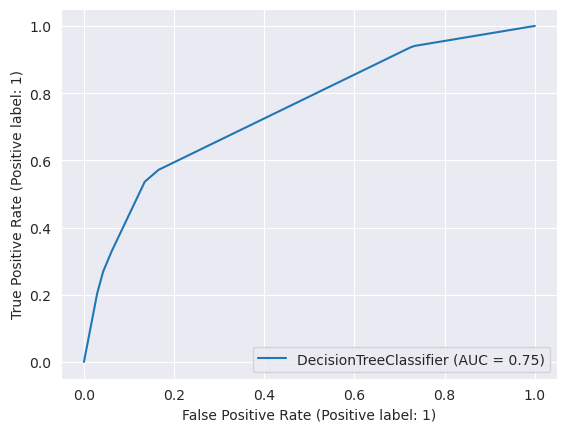

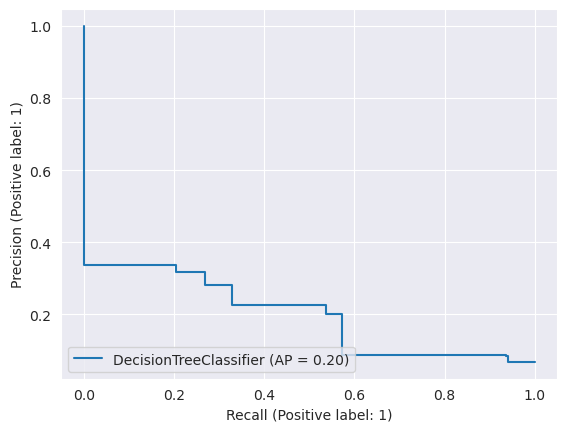

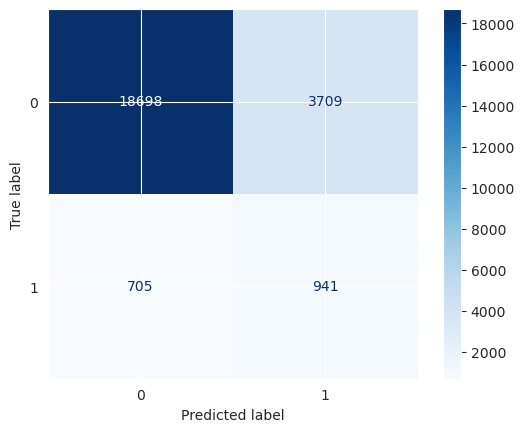

In [16]:
calculate_metrics(grid_tree.best_estimator_)

0.7384930105693828


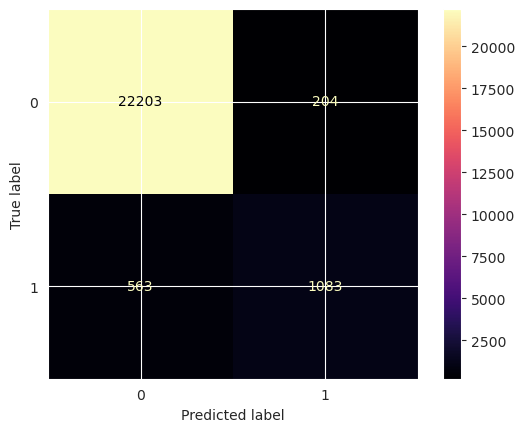

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc = RandomForestClassifier(n_estimators=250, min_samples_leaf=2, random_state=101, class_weight='balanced')
rfc.fit(X, y)
print(f1_score(y_test, rfc.predict(X_test)))
rfcm = ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, cmap='magma')

0.29891994917407877


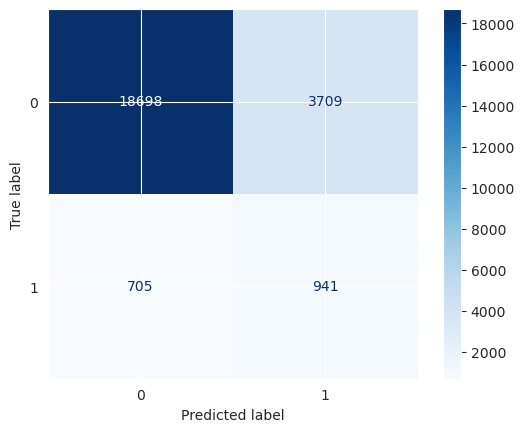

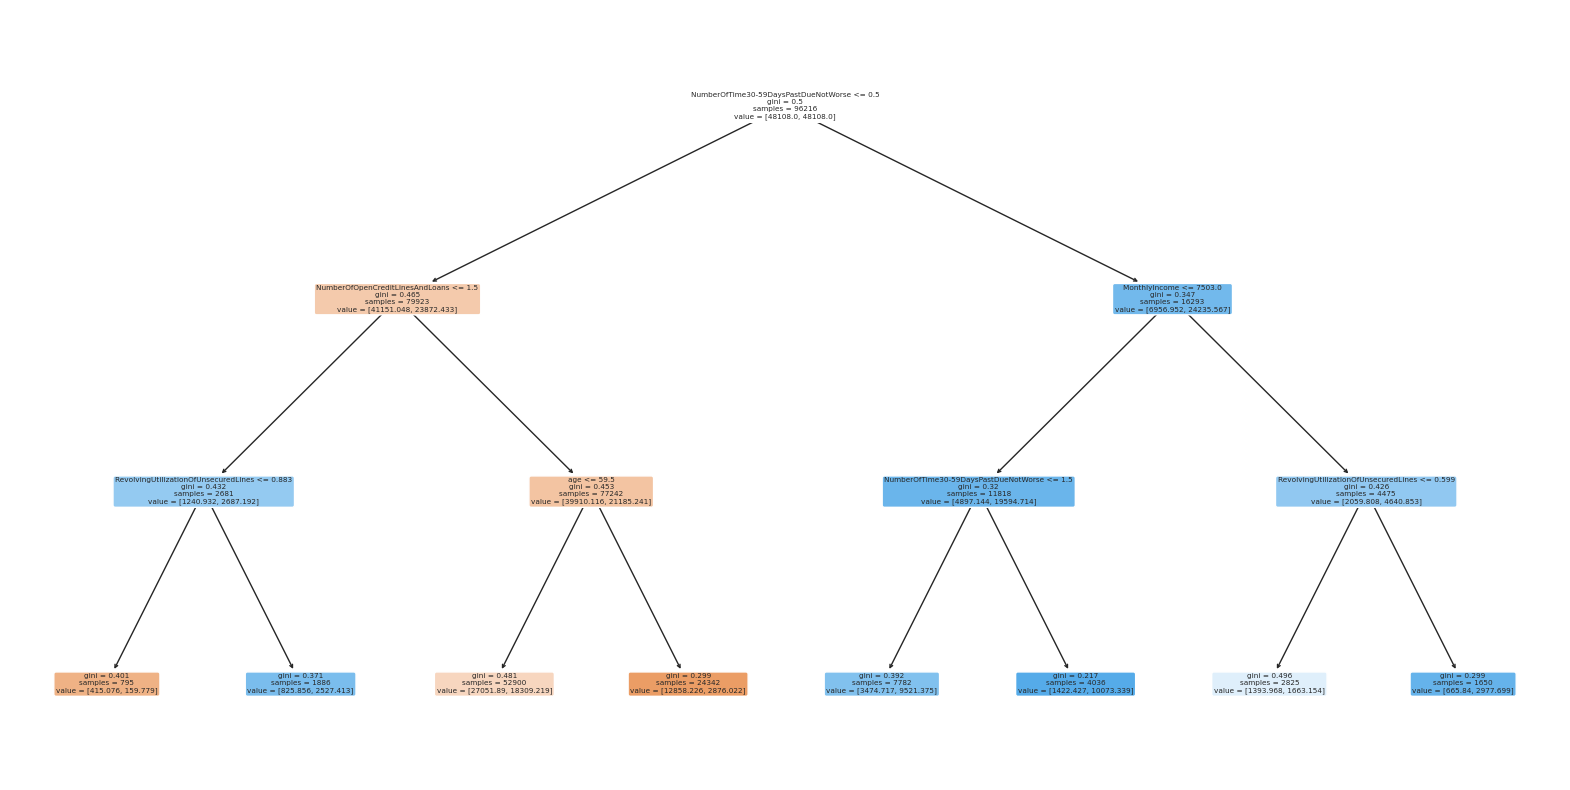

In [18]:
cd = ConfusionMatrixDisplay.from_estimator(grid_tree, X_test, y_test, cmap='Blues')
cd.figure_.savefig('report_pictures/tree.png')
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(grid_tree.best_estimator_, filled=True, rounded=True, feature_names=list(X.columns));
print(f1_score(y_test, grid_tree.predict(X_test)))


In [19]:
rfcm.figure_.savefig('report_pictures/rfcm.png')

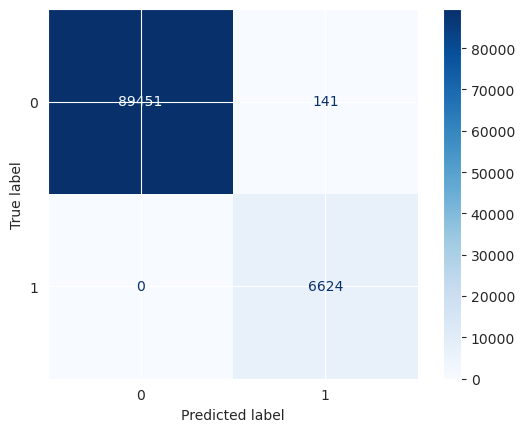

In [20]:
ConfusionMatrixDisplay.from_estimator(rfc, X, y, cmap='Blues')

0.29335609617299757


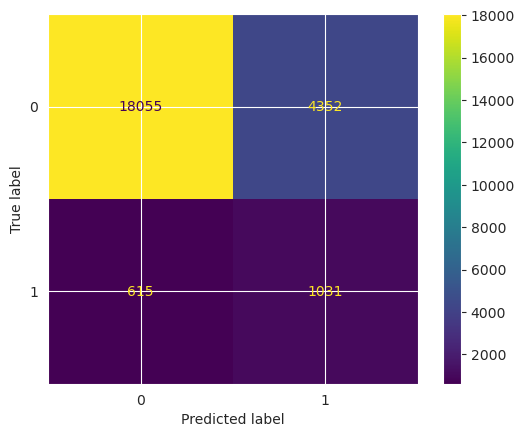

In [21]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C = 0.1, class_weight='balanced', solver='newton-cholesky')
logistic.fit(X, y)
cm = ConfusionMatrixDisplay.from_estimator(logistic, X_test, y_test)
cm.figure_.savefig('report_pictures/cm_logistic.png')
print(f1_score(y_test, logistic.predict(X_test)))

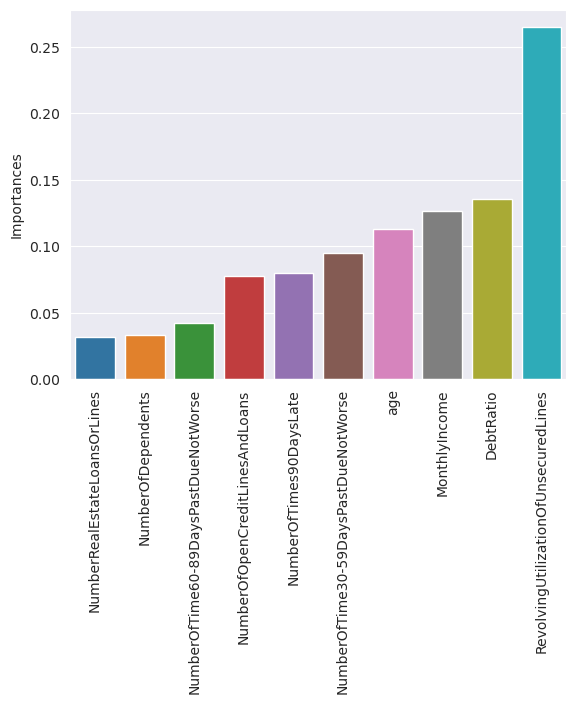

In [22]:
sers = pd.Series(rfc.feature_importances_, index=X.columns).sort_values()
imps = pd.DataFrame(sers, columns=['Importances'])
sns.barplot(data=imps, x = imps.index, y='Importances')
plt.xticks(rotation=90);

In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [24]:
ada = AdaBoostClassifier(n_estimators=250, random_state=101)

In [25]:
ada.fit(X, y)

AdaBoostClassifier(n_estimators=250, random_state=101)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22407
           1       0.53      0.21      0.30      1646

    accuracy                           0.93     24053
   macro avg       0.74      0.60      0.63     24053
weighted avg       0.92      0.93      0.92     24053


<Figure size 2000x1600 with 0 Axes>

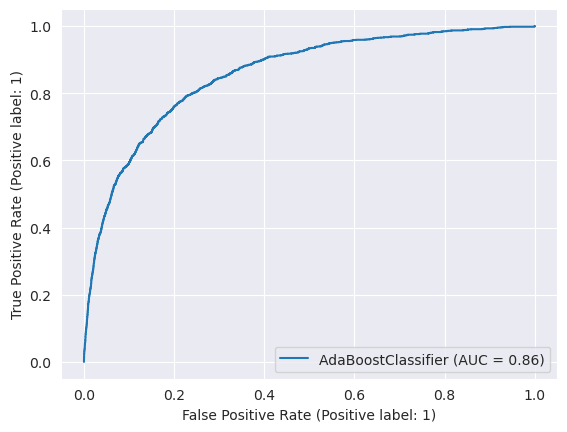

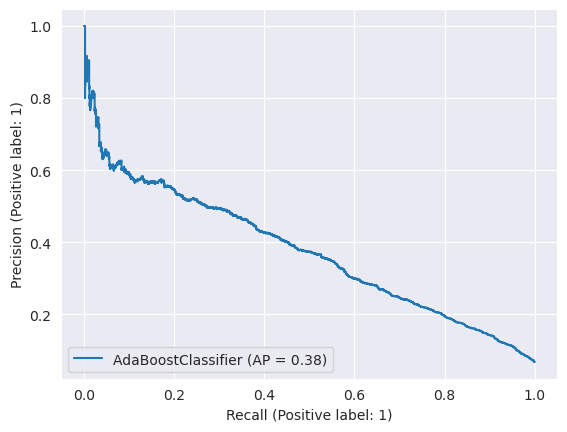

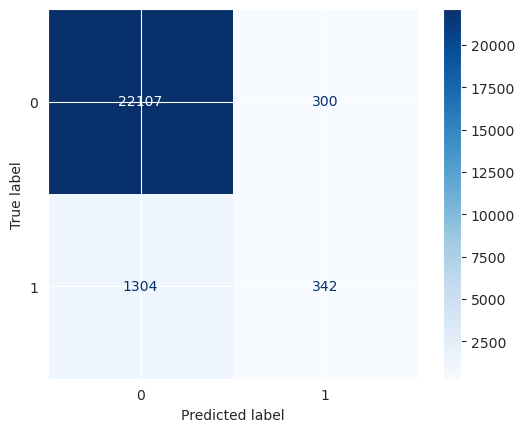

In [26]:
calculate_metrics(ada)

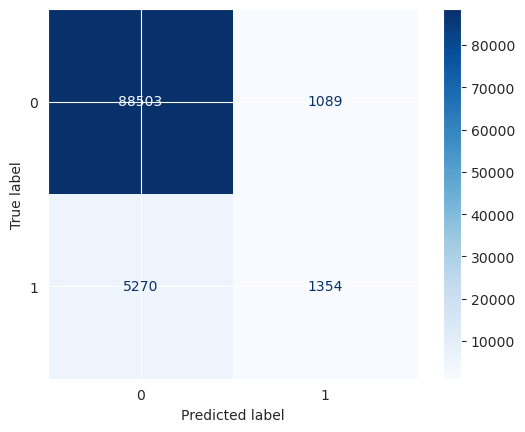

In [27]:
ConfusionMatrixDisplay.from_estimator(ada, X, y, cmap='Blues')